In [24]:
import numpy as np
import matplotlib.pyplot as plt

MATH 387: Honours Numerical $\qquad$
Midterm $\qquad$ 
Luke Steverango $\qquad$
260570652

Midterm: Theory Section

(a) We have by Taylor's theorem that for a $f \in C^{3}$ then we can write $f(x)$ in the interval $(-a,a)$ for any $x \in (-a,a)$ as follows around the point $0$,

$$ f(x) = f(0) + xf'(0) + \frac{x^{2}}{2}f''(0) + \frac{x^{3}}{3!}f'''(\gamma),$$

where $\gamma \in (-a,a)$. Now for $h \in (0,a)$ and $-h \in (-a,0)$, we then write,

$$f(h) = f(0) + hf'(0) + \frac{h^{2}}{2}f''(0) + \frac{h^{3}}{3!}f'''(\gamma_{1}).$$

and

$$f(-h) = f(0) - hf'(0) + \frac{h^{2}}{2}f''(0) - \frac{h^{3}}{3!}f'''(\gamma_{2}),$$

where $\gamma_{1} \in (0,a),\gamma_{2} \in (-a,0)$. Now taking the first equation and minusing by the second we have,

$$f(h) - f(-h) = hf'(0) + hf'(0) + \frac{h^{3}}{3!}f'''(\gamma_{1}) + \frac{h^{3}}{3!}f'''(\gamma_{2}),$$

i.e.

$$f(h) - f(-h) = 2hf'(0) + \frac{h^{3}}{3!}(f'''(\gamma_{1}) + f'''(\gamma_{2})).$$

Let $f'''(\xi) = \frac{1}{2}(f'''(\gamma_{1}) + f'''(\gamma_{2}))$, which exists by $f \in C^{3}$, and divide by $2h$ and we get,

$$\frac{f(h) - f(-h)}{2h} = f'(0) + \frac{h^{2}}{6}f'''(\xi),$$

or 

$$ D(h) - f'(0) = \frac{h^{2}}{6}f'''(\xi).$$

Thus if you take take the inexact $D_{\delta}$ version of the difference equation you then get

$$ D_{\delta}(h) - f'(0) = \frac{h^{2}}{6}f'''(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h}.$$

(b) So we have that $|\delta f(x)| \leq \epsilon$ for $x \in (-a,a)$. We then have by the triangle inequality

$$ |\delta f(x) - \delta f(-x)| \leq |\delta f(x)| + |\delta f(-x)| \leq \epsilon + \epsilon = 2\epsilon,$$

and given that $M = \max_{x \in[-a,a]} |f'''(x)|$, we then have the bound

$$|D(h) - f'(0)| \leq \frac{Mh^{2}}{6} + \frac{\epsilon}{h},$$ 

i.e. the bound we want. To minimize the function we take the derivative of the function and set it to zero.

$$B'(h) = \frac{Mh}{3} - \frac{\epsilon}{h^{2}} = 0.$$

From which we get,

$$\frac{Mh}{3} - \frac{\epsilon}{h^{2}} = 0 \implies \frac{Mh}{3} = \frac{\epsilon}{h^{2}} \implies h = \left(\frac{3\epsilon}{M}\right)^{1/3}.$$

Thus $B(h)$ is minimized at $h = \left(\frac{3\epsilon}{M}\right)^{1/3}$. Note, this is a minimum as the leading order term of $B(h)$ is quadratic, so its a convex function, meaning the function attains a minimum at $B'(h) = 0$. I plot the function below for $\epsilon = 0.5$ and $M = 5$.

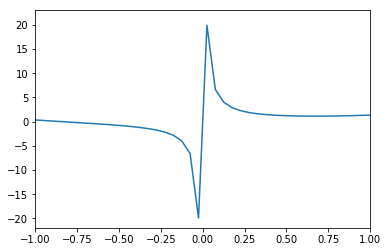

In [34]:
points = np.linspace(-5,5,200)
epsilon = 0.5
M = 5
y = epsilon/(points) + M*(points)**2/(6)

plt.plot(points, y)
plt.xlim([-1,1])
plt.show()

As one can see from the plot, if you take $h$ too small, then you observe a rapid increase in the value of the bound, which means the approximation of the Taylor series to a function at $0$ won't be as exact. 

Midterm: Lab Section

To begin this lab section of the midterm, we will be studying the Runge Phenomenon. The Runge Phenomenon is characterized by high oscillation of the approximation values, specifically near the end of an interval with equidistant approximation values. The approximating polynomial starts to diverge rapidly from the function values of the actual function, near the endpoints of the interval. Thus it can lead to

$$  \lim_{n \rightarrow \infty} \left\{\max_{[-n,n]} |f(x) - P_{n}(x)|\right\} = +\infty $$

Where the interval defined is $[-n,n]$, $f(x)$ is the polynomial and $P_{n}(x)$ is the approximating polynomial of order $n$. This this happens when we take $n+1$ distinct, equidistant points to interpolate over.

For part (a) of the lab we will proceed to create Lagrange polynomials for my specified function. I have chosen the following function:

$$ -\log\left(\cos^{2}\left(\frac{1}{1+x^{2}}\right)\right)$$

Note, I chose $\cos^{2}$ as I wanted to avoid negative arguments for the log function. Below is a plot of the function.

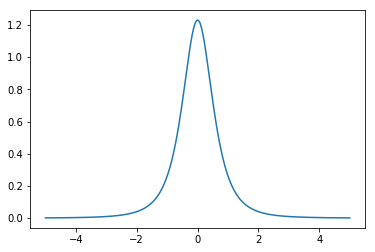

In [23]:
x_points2 = np.linspace(-5,5,200)
y_points2 = -np.log((np.cos(1/(1+x_points2**2)))**2)

plt.plot(x_points2, y_points2)
plt.show()

Now we will plot our function against the Lagrangian Interpolation Polynomial. Numpy comes with a built in Vandermonde function so I will use that to solve for the coefficients and then create my polynomial from that.

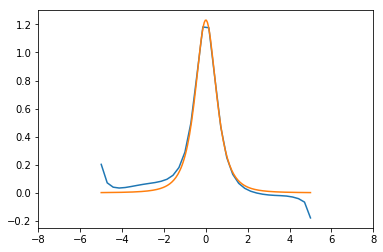

In [26]:
degree = 36 #Sets the degree of the polynomial to be used
x_points = np.linspace(-5,5,degree) #Points to be used for interpolation
x_points2 = np.linspace(-5,5,200) #Points to plot the actual function
y_points = -np.log((np.cos(1/(1+x_points**2)))**2) #Calculates the y-values for the function at the interpolation points
y_points2 = -np.log((np.cos(1/(1+x_points2**2)))**2) #Calculates the y-values of the function, for the general function

# Vandermonde Matrix via Numpy
vand = np.vander(x_points, degree, increasing=True)
inv_van = np.linalg.inv(vand)

# Interpolated values, flipped so its of the form [a_n, ..., a_0]
interpol = np.flip(inv_van.dot(y_points),0) 
#Solves the Vandermonde matrix to get the coefficients of the Lagrangian Interpolation polynomial and then flips them

# The Lagrangian Interpolatio Polynomial
p = np.poly1d(interpol)
interpolated_values = []
for i in range(x_points.size):
    interpolated_values.append(p(x_points[i]))

# For Plotting
%matplotlib inline
# interpolation
plt.plot(x_points, interpolated_values)
# True Function
plt.plot(x_points2, y_points2)
plt.xlim([-8,8])
plt.show()

As you can see for the chosen degree of $n=36$, our Lagrange polynomial (blue) has a very good fit for the function, but the max sources of error start to occur near the end of the interval of $[-5,5]$. Thus we see the Runge Phenomenon for our chosen polynomial.

Next we will do the same thing but using Chebyshev polynomials.

As taken from (Suli pg. 241), the Chebyshev polynomial is defined as follows:

$$ C_{n}(x) = \cos\left(n\cos^{-1}(x)\right), \qquad n = 0,1,2,...$$.

It can be shown that this is a polynomial $\forall n$ as given the trigonometric identity,

$$ \cos(n+1)\cos^{-1}(x) + \cos(n-1)\cos^{-1}(x) = 2\cos\left(\cos^{-1}(x)\right)\cos\left(n\cos^{-1}(x)\right) $$

We then have 

$$ C_{n+1}(x) = 2xC_{n}(x) - C_{n-1}(x), \qquad n = 1,2,3,....., \quad x \in [-1,1] $$.

Since $C_{0}(x) = 1$ and $C_{1}(x) = x$, we have that by induction, this recurrence relation defines the Chebyshev polynomials for any given function. For Chebyshev interpolation, we then take the zeros of the Chebyshev polynomial and apply it to the Lagrange interpolation.

For the actual code however, numpy comes with a predefined Vandermonde matrix that solves the Chebyshev version of the Lagrange interpolation. We then follow the same steps as above and plot the function. 

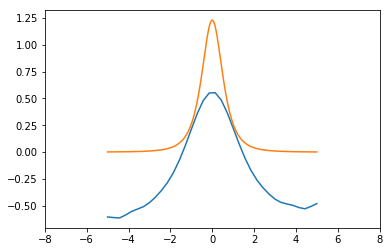

In [31]:
#We repeat the above steps for the Chebyshev polynomials
degree = 36
# Vandermonde matrix to specifically solve for Chebyshev polynomials
cheby = np.polynomial.chebyshev.chebvander(x_points, degree - 1)
inv_cheby = np.linalg.inv(cheby)

# Interpolated values, flipped so its of the form [a_n, ..., a_0]
interpol_cheby = np.flip(inv_cheby.dot(y_points),0)

# The Chebyshev Interpolation Polynomial
p = np.poly1d(interpol_cheby)
interpolated_values = []
for i in range(x_points.size):
    interpolated_values.append(p(x_points[i]))

# For Plotting
%matplotlib inline
# Interpolation
plt.plot(x_points, interpolated_values)
# True Function
plt.plot(x_points2, y_points2)
plt.xlim([-8,8])
plt.show()

As you can see from the above plot, we have that the Chebyshev polynomials at the same degree actually perform worse for the overall function in approximating it. Also, one can see that the Runge Phenomenon is also still present in the above plot and arguably worse for the function overall. This is rather odd as the Chebyshev nodes should arguably make the approximation better. 

We will now proceed to part (c) and compute the Bernstein Polynomials for the function given.

We have that the Bernstein Polynomials are given by the following function (Suli pg. 227 and Wikipedia)

$$ p_{n}(x) = \sum^{n}_{i=0} p_{n,i}(x)f(i/n), \qquad x \in (0,1)$$.

Where the $f(i/n)$ is the given function evaluated at $i/n$, and the Bernstein Basis functions, $p_{n,i}(x)$ are given by

$$ p_{n,i}(x) = \binom{n}{i}x^{i}(1-x)^{n-i}, \qquad x \in [0,1]$$.

One can also recognize $p_{n,i}(x)$ as the Binomial probability mass function with probability, $x$.


In [39]:
import scipy.special as scp # Need to import the ability to use the Binomial Coefficient

def bernstein_basis(n,i,t):
    return scp.binom(n,i)*(1-t)**(n-i) * t**i # Creating the Bernstein basis polynomials, p_{n,i}(x)

# Creating the Bernstien function as defined above
def bern_poly(n,t):
    x = 0
    for i in range(1, n+1):
        x = x -np.log((np.cos(1/(1+(i/n)**2)))**2)*bernstein_basis(n,i,t)
    return x

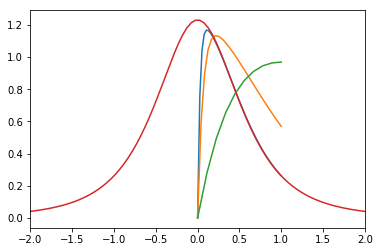

In [40]:
# Plotting 3 different Bernstein Curves with varying degrees of approximation

bern_poly_values = []
bern_poly_values1 = []
bern_poly_values2 = []
x_points = np.linspace(0,1,39)

for i in range(x_points.size):
    bern_poly_values.append(bern_poly(degree,x_points[i]))

x_points3 = np.linspace(0,1,25)
for i in range(x_points3.size):
    bern_poly_values1.append(bern_poly(25,x_points[i]))
    
x_points4 = np.linspace(0,1,10)
for i in range(x_points4.size):
    bern_poly_values2.append(bern_poly(10,x_points[i]))

# For Plotting
%matplotlib inline
# Interpolation
plt.plot(x_points, bern_poly_values)
plt.plot(x_points3, bern_poly_values1)
plt.plot(x_points4, bern_poly_values2)

# True Function
plt.plot(x_points2, y_points2)
plt.xlim([-2,2])
# Note we restrict the axis that is dispplayed due to the Bernstein Polynomials only being valid in a range of [0,1]
plt.show()  

We see from the above plot for our function (red), that the Bernstein polynomials of orders $n=10$ (green), $n=10$ (orange), $n=39$ (blue), get increasingly more likely to predict the path of our function for $x \in [0,1]$ as the order of the polynomial increases. In comparison with the interpolation, I believe the Bernstein polynomials are better than the Lagrangian Interpolation polynomials over smaller intervals, as if you scale the Bernstein polynomials of a high degree you would attain very good fit as seen by the plots. 